### 01. How to labeling ?

[1] How to labeling, Youtube, https://www.youtube.com/watch?v=p0nR2YsCY_U&feature=youtu.be     
[2] How to download, Github, OpenSource MIT License, https://github.com/tzutalin/labelImg   

### 02. How to download the data?

[1] Pet dataset, https://www.robots.ox.ac.uk/~vgg/data/pets/

### 03 Check the dataset using glob

In [1]:
import os # change the file, find the path, cmd window command and so on
from glob import glob # load the path
import numpy as np # matrix calculation 
import tensorflow as tf # deep learning library
from PIL import Image # image view
import matplotlib.pyplot as plt #graph view

#### 03.01 current directory

In [2]:
os.getcwd()

'/home/nvidia/Deep_Learning_Project/03.Deep_Learning_All_In_One_Fast_Campus/06_deep_learning_real_project'

#### 03.02 List the name of images

In [3]:
os.listdir('/home/nvidia/ai_data/pets/images')[:10] # check what file in this directory

['beagle_148.jpg',
 'keeshond_194.jpg',
 'wheaten_terrier_68.jpg',
 'Ragdoll_149.jpg',
 'staffordshire_bull_terrier_114.jpg',
 'shiba_inu_102.jpg',
 'american_pit_bull_terrier_157.jpg',
 'scottish_terrier_9.jpg',
 'shiba_inu_31.jpg',
 'leonberger_78.jpg']

#### 03.03 List the name of the xmls

In [6]:
os.listdir('/home/nvidia/ai_data/pets/annotations/xmls/')[:10]

['British_Shorthair_148.xml',
 'Egyptian_Mau_168.xml',
 'chihuahua_115.xml',
 'english_setter_183.xml',
 'newfoundland_107.xml',
 'British_Shorthair_120.xml',
 'american_bulldog_135.xml',
 'British_Shorthair_134.xml',
 'samoyed_15.xml',
 'Bengal_148.xml']

#### 03.04 List the name of the .png

In [7]:
os.listdir('/home/nvidia/ai_data/pets/annotations/trimaps/')[:10]

['japanese_chin_96.png',
 'Siamese_135.png',
 'Ragdoll_106.png',
 'miniature_pinscher_58.png',
 'Russian_Blue_192.png',
 'Bombay_194.png',
 'german_shorthaired_185.png',
 'beagle_91.png',
 'staffordshire_bull_terrier_97.png',
 'Birman_95.png']

#### 03.05 Load the all name of images, annoations

In [8]:
data_path_image = glob('/home/nvidia/ai_data/pets/images/*.jpg')
data_path_trimap = glob('/home/nvidia/ai_data/pets/annotations/trimaps/*.png')
data_path_xmls = glob('/home/nvidia/ai_data/pets/annotations/xmls/*.xml')

In [9]:
print('image num =', len(data_path_image), 'trimap num =' , len(data_path_trimap), 'xmls_num =' , len(data_path_xmls))

image num = 7390 trimap num = 7390 xmls_num = 3686


In [10]:
print("image_name =", data_path_image[100], "    trimap_name = ", data_path_trimap[100], "   xml_name =", data_path_xmls[100])

image_name = /home/nvidia/ai_data/pets/images/Bombay_76.jpg     trimap_name =  /home/nvidia/ai_data/pets/annotations/trimaps/pomeranian_188.png    xml_name = /home/nvidia/ai_data/pets/annotations/xmls/leonberger_115.xml


#### Result = The number of xmls is less than image means that all not all image have labels

### 04. Draw the image and square

#### 04.01 Load the library

In [11]:
from PIL import Image # image visualization
from matplotlib.patches import Rectangle # Draw Rectangle
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as et
import random
import os

#### 04.02 Load the Image

In [12]:
random_index = random.randint(1,len(data_path_xmls))

In [13]:
os.path.split(data_path_xmls[random_index])[-1]

'german_shorthaired_184.xml'

In [14]:
xml_random_name = os.path.split(data_path_xmls[random_index])[-1]

In [15]:
name = xml_random_name.split('.')[0]

In [34]:
path_image = '/home/nvidia/ai_data/pets/images'
path_trimap = '/home/nvidia/ai_data/pets/annotations/trimaps'
path_xmls = '/home/nvidia/ai_data/pets/annotations/xmls'

In [35]:
image_name = os.path.join(path_image,name)+'.jpg'
trimap_name = os.path.join(path_trimap,name)+'.png'
xml_name = os.path.join(path_xmls,name)+'.xml'

In [36]:
print(image_name,trimap_name,xml_name)

/home/nvidia/ai_data/pets/images/german_shorthaired_184.jpg /home/nvidia/ai_data/pets/annotations/trimaps/german_shorthaired_184.png /home/nvidia/ai_data/pets/annotations/xmls/german_shorthaired_184.xml


In [37]:
image = Image.open(image_name)
trimap = Image.open(trimap_name)

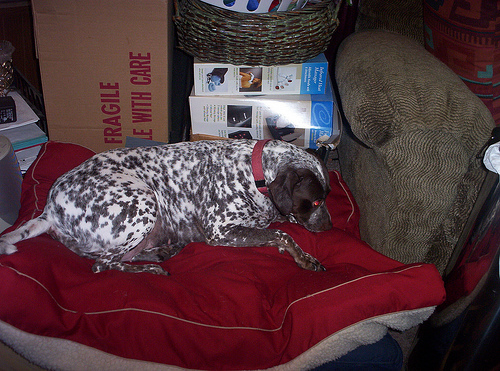

In [38]:
image

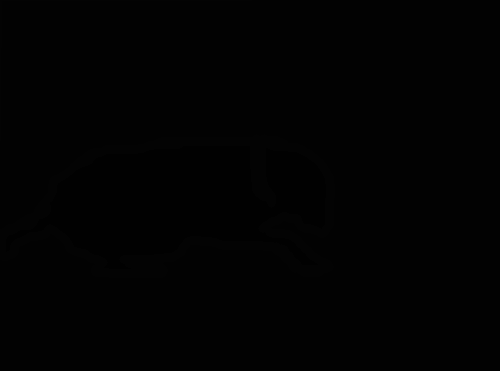

In [39]:
trimap

#### 04.03 Change from image to array

In [40]:
image = np.array(image)
trimap = np.array(trimap)

#### 04.04  Parsing the xml

In [41]:
tree = et.parse(xml_name)

In [42]:
width = float(tree.find('./size/width').text)
height = float(tree.find('./size/height').text)
xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rec_x = xmin
rec_y = ymin
rec_w = xmax-xmin
rec_h = ymax-ymin

In [43]:
rect = Rectangle((rec_x,rec_y),rec_w,rec_h,fill=False, color='red')

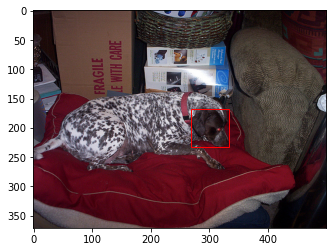

In [44]:
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

#### 04.05 Draw trimap images

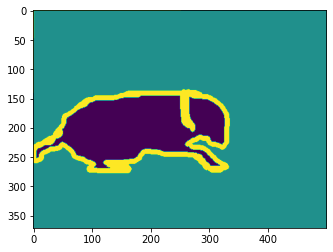

In [45]:
plt.imshow(trimap)